## 1. Package Installation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as plt
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.preprocessing import LabelEncoder

## 2. Load Data

In [3]:
#Everytime you run this you will have to restart the Kernal otherwise it will go back too far 
cd ..

/Users/romacoffin/Desktop/DATA 1030/data1030_student_f20/Health-Insurance-Cross-Sell-Prediction


In [4]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
print(df.shape)

(381109, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## 3. Describe and Value Counts, Each Feature

In [8]:
#Numerical
print(df[['Age', 'Region_Code','Policy_Sales_Channel', 'Annual_Premium', 'Vintage']].describe())

                 Age    Region_Code  Policy_Sales_Channel  Annual_Premium  \
count  381109.000000  381109.000000         381109.000000   381109.000000   
mean       38.822584      26.388807            112.034295    30564.389581   
std        15.511611      13.229888             54.203995    17213.155057   
min        20.000000       0.000000              1.000000     2630.000000   
25%        25.000000      15.000000             29.000000    24405.000000   
50%        36.000000      28.000000            133.000000    31669.000000   
75%        49.000000      35.000000            152.000000    39400.000000   
max        85.000000      52.000000            163.000000   540165.000000   

             Vintage  
count  381109.000000  
mean      154.347397  
std        83.671304  
min        10.000000  
25%        82.000000  
50%       154.000000  
75%       227.000000  
max       299.000000  


In [18]:
#Categorical Gender
print(df['Gender'].value_counts())

Male      206089
Female    175020
Name: Gender, dtype: int64


In [9]:
#Categorical Driving License
print(df['Driving_License'].value_counts())

1    380297
0       812
Name: Driving_License, dtype: int64


In [10]:
#Categorical Previously Insured
print(df['Previously_Insured'].value_counts())

0    206481
1    174628
Name: Previously_Insured, dtype: int64


In [11]:
#Categorical Vehicle Age
print(df['Vehicle_Age'].value_counts())

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [12]:
#Categorical Vehicle Damage
print(df['Vehicle_Damage'].value_counts())

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [13]:
#Categorical Response
print(df['Response'].value_counts())

0    334399
1     46710
Name: Response, dtype: int64


## 4. Graph Each Feature

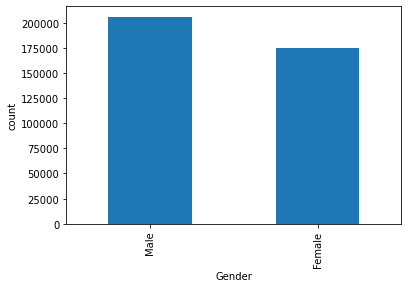

In [19]:
pd.value_counts(df['Gender']).plot.bar()
plt.ylabel('count')
plt.xlabel('Gender')
plt.show()
#Dataset contains more number of Male than Female.
#So from that perspective the Response according to Gender(Male & Female) are Equal

In [34]:
import matplotlib
from matplotlib import pylab as plt

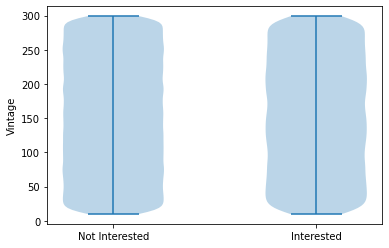

In [48]:
dataset = [df[df['Response']==0]['Vintage'].values,
           df[df['Response']==1]['Vintage'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Not Interested','Interested'])
plt.ylabel('Vintage')
plt.show()
#Vintage does not show us very much, seems pretty equal (Interested is a bit more bumpy)

In [21]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(df['Age'], df['Annual_Premium'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

/Users/romacoffin/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


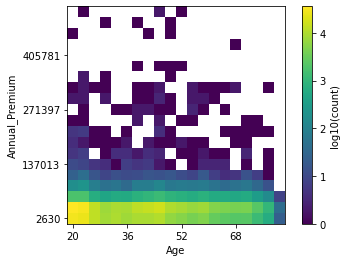

In [22]:
plt.imshow(np.log10(heatmap).T, origin='lower') # use log count
plt.xlabel('Age')
plt.ylabel('Annual_Premium')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='log10(count)')
plt.show()
#See more concentratin for younger age and less premium 

In [24]:
count_matrix = df.groupby(['Driving_License', 'Response']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Response                0         1
Driving_License                    
0                0.949507  0.050493
1                0.877283  0.122717


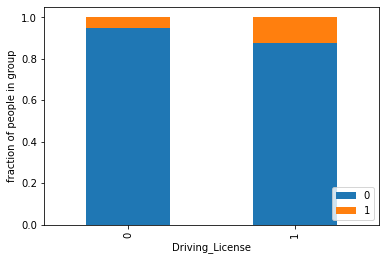

In [25]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()
#People with no drivers license are more likely to be interested in purchasing vehicle insurance 
##People with no past vehicle damage are less likely to be interested in purchasing vehicle insurance 

In [37]:
count_matrix = df.groupby(['Previously_Insured', 'Response']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Response                   0         1
Previously_Insured                    
0                   0.774546  0.225454
1                   0.999095  0.000905


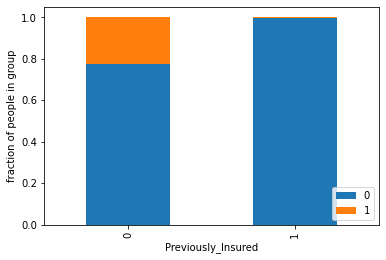

In [38]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()
#People not previously insured are more likely to be interested in purchasing vehicle insurance 

In [39]:
count_matrix = df.groupby(['Vehicle_Age', 'Response']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Response            0         1
Vehicle_Age                    
1-2 Year     0.826245  0.173755
< 1 Year     0.956295  0.043705
> 2 Years    0.706254  0.293746


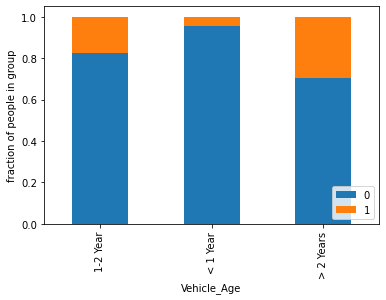

In [40]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()
#As vehicle ages people are more likely to be interested in purchasing vehicle insurance 

## 5. Graphs Used in Summary or Referenced

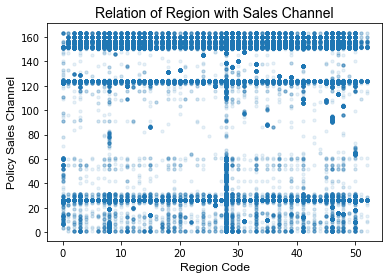

<Figure size 432x288 with 0 Axes>

In [6]:
df.plot.scatter('Region_Code','Policy_Sales_Channel',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title('Relation of Region with Sales Channel', fontname="Arial", fontsize=14)
plt.xlabel('Region Code', fontname="Arial", fontsize=12)
plt.ylabel('Policy Sales Channel', fontname="Arial", fontsize=12)
plt.show()

plt.savefig('Figures/Relation_of_Region_with_Sales_Channel.png', dpi=300, format='png')
#Seeing what Policy_Sales_Channel and Region_Code can tell us
#Hoping both feautures can show if certain locations have better sales with certain distribution channels
#Region 28 shows something interesting

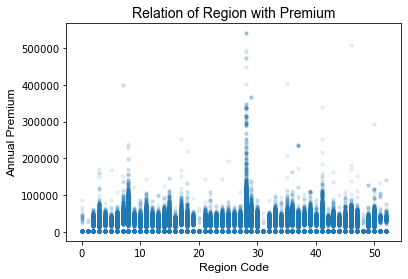

<Figure size 432x288 with 0 Axes>

In [7]:
df.plot.scatter('Region_Code','Annual_Premium',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title('Relation of Region with Premium', fontname="Arial", fontsize=14)
plt.ylabel('Annual Premium', fontname="Arial", fontsize=12)
plt.xlabel('Region Code', fontname="Arial", fontsize=12)
plt.show()
plt.savefig('Figures/Relation_of_Region_with_Premium.png', dpi=300, format='png')
#continuing from point above, see region 28 with high premium 

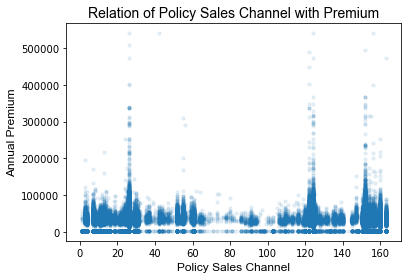

<Figure size 432x288 with 0 Axes>

In [8]:
df.plot.scatter('Policy_Sales_Channel','Annual_Premium',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title('Relation of Policy Sales Channel with Premium', fontname="Arial", fontsize=14)
plt.ylabel('Annual Premium', fontname="Arial", fontsize=12)
plt.xlabel('Policy Sales Channel', fontname="Arial", fontsize=12)
plt.show()
plt.savefig('Figures/Relation_of_Policy_Sales_Channel_with_Premium.png', dpi=300, format='png')
#continuing from point above, see policy sales channel ~28, ~125, and ~150 with high premium 

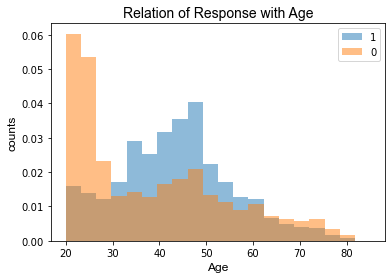

<Figure size 432x288 with 0 Axes>

In [9]:
#import matplotlib
#from matplotlib import pylab as plt

categories = df['Response'].unique()
bin_range = (df['Age'].min(),df['Age'].max())

for c in categories:
    plt.hist(df[df['Response']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
#plt.legend([0, 1], ["Not Interested", "Interested"]) 
plt.legend()
plt.title('Relation of Response with Age', fontname="Arial", fontsize=14)
plt.ylabel('counts', fontname="Arial", fontsize=12)
plt.xlabel('Age', fontname="Arial", fontsize=12)
plt.show()
plt.savefig('Figures/Relation_of_Response_with_Age.png', dpi=300, format='png')
#Here we can see that, people ages between 39 to 50 are most likely to Response
#People ages between 20 to 30 are most likely to Not Response

In [11]:
count_matrix = df.groupby(['Vehicle_Damage', 'Response']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Response               0         1
Vehicle_Damage                    
No              0.994796  0.005204
Yes             0.762345  0.237655


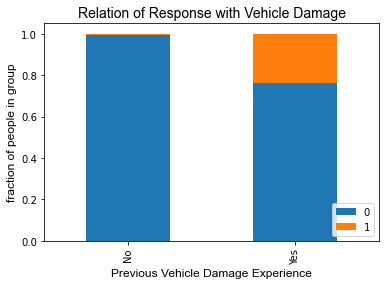

<Figure size 432x288 with 0 Axes>

In [12]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.xlabel('Previous Vehicle Damage Experience', fontname="Arial", fontsize=12)
plt.ylabel('fraction of people in group', fontname="Arial", fontsize=12)
plt.legend(loc=4)
plt.title('Relation of Response with Vehicle Damage', fontname="Arial", fontsize=14)
plt.show()
plt.savefig('Figures/Relation_of_Response_with_Vehicle_Damage.png', dpi=300, format='png')
#People with past vehicle damage are more likely to be interested in purchasing vehicle insurance 
##People with no past vehicle damage are less likely to be interested in purchasing vehicle insurance 

## 6 Data Preprocessing

In [8]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
# let's separate the feature matrix X, and target variable y
y = df['Response'] # we want to predict target variable
X = df.loc[:, df.columns != 'Response'] # all other columns are features
print(y)
print(X.head())

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64
   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0   > 2 Years            Yes         40454.0                  26.0      217  
1    1-2 Year             No         33536.0                  26.0      183  
2   > 2 Years            Yes         38294.0                  26.0       27  
3    < 1 Year             No         28619.0                 152.0      203  


In [10]:
random_state = 42
# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

training set: (228665, 11) (228665,)
(152444, 11) (152444,)
validation set: (76222, 11) (76222,)
test set: (76222, 11) (76222,)


In [20]:
#removed id and vintage from datasets 
X_train.drop(["id","Vintage"],axis = 1,inplace=True)
X_val.drop(["id","Vintage"],axis = 1,inplace=True)
X_test.drop(["id","Vintage"],axis = 1,inplace=True)
print(X_train.head())
print(X_val.head())
print(X_test.head())

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
246277  Female   24                1         36.0                   0   
203766    Male   21                1         13.0                   1   
163722    Male   51                1          8.0                   0   
77457   Female   41                1          8.0                   0   
85469     Male   45                1         28.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  
246277    < 1 Year            Yes         42588.0                 152.0  
203766    < 1 Year             No         25033.0                 160.0  
163722    1-2 Year            Yes          2630.0                   7.0  
77457     1-2 Year            Yes         44833.0                   7.0  
85469    > 2 Years            Yes         63700.0                 124.0  
        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
298077  Female   26                1        

In [25]:
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = ['Vehicle_Age'] 
ordinal_cats = [['< 1 Year','1-2 Year','> 2 Years']]
onehot_ftrs = ['Gender','Driving_License','Vehicle_Damage','Previously_Insured']
minmax_ftrs = ['Age']
std_ftrs = ['Region_Code','Annual_Premium', 'Policy_Sales_Channel']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

# the target variable still needs to be preprocessed separately
#le = LabelEncoder()
#y_train_prep = le.fit_transform(y_train)
#y_val_prep = le.transform(y_val)
#y_test_prep = le.transform(y_test)

(228665, 9)
(228665, 13)
[[ 0.          1.          0.         ...  0.72492148  0.69517466
   0.73924822]
 [ 0.          0.          1.         ... -1.01628608 -0.32113214
   0.88665514]
 [ 1.          0.          1.         ... -1.39480946 -1.61810288
  -1.93250221]
 ...
 [ 0.          1.          0.         ... -1.84903752 -0.67867762
   0.73924822]
 [ 1.          0.          1.         ...  0.42210278 -1.61810288
   0.81295168]
 [ 0.          1.          0.         ...  0.80062616 -0.33803682
   0.73924822]]


/Users/romacoffin/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
